In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [10]:
# Read CSV Files for both implementations
df_csr_bulk = pd.read_csv("spmv_csr_vector_bulk_rave_d-AggregatedResults.csv", header=0)
df_csr_naive = pd.read_csv("spmv_csr_vector_rave_d-AggregatedResults.csv", header=0)
df_sellcs = pd.read_csv("spmv_csr_vector_rave_d-AggregatedResults.csv", header=0)

# Find common matrices between both implementations
common_matrices = set(df_csr_bulk['matrix_name']).intersection(set(df_csr_naive['matrix_name']))
common_matrices = set(common_matrices).intersection(set(df_sellcs['matrix_name']))

print(f"Number of common matrices: {len(common_matrices)}")

# Filter both dataframes to include only common matrices
df_csr_bulk = df_csr_bulk[df_csr_bulk['matrix_name'].isin(common_matrices)]
df_csr_naive = df_csr_naive[df_csr_naive['matrix_name'].isin(common_matrices)]
df_sellcs = df_sellcs[df_sellcs['matrix_name'].isin(common_matrices)]

# Sort both dataframes by matrix name to ensure alignment
df_csr_bulk = df_csr_bulk.sort_values('matrix_name').reset_index(drop=True)
df_csr_naive = df_csr_naive.sort_values('matrix_name').reset_index(drop=True)
df_sellcs = df_sellcs.sort_values('matrix_name').reset_index(drop=True)

# Print verification info
print("\nFirst few matrices in each implementation after filtering:")
print("Bulk implementation:", df_csr_bulk['matrix_name'].head().tolist())
print("Naive implementation:", df_csr_naive['matrix_name'].head().tolist())

# Combine the dataframes for comparison
df_csr_bulk['implementation'] = 'CSR Bulk'
df_csr_naive['implementation'] = 'CSR Naive'
df_sellcs['implementation'] = 'CSR Sell-C-S'
df_combined = pd.concat([df_csr_bulk, df_csr_naive, df_sellcs])

# Set the style of seaborn
seaborn.set_theme(style="whitegrid", palette="deep")

Number of common matrices: 13

First few matrices in each implementation after filtering:
Bulk implementation: ['Si41Ge41H72', 'com-Youtube', 'dgreen', 'eu-2005', 'human_gene1']
Naive implementation: ['Si41Ge41H72', 'com-Youtube', 'dgreen', 'eu-2005', 'human_gene1']


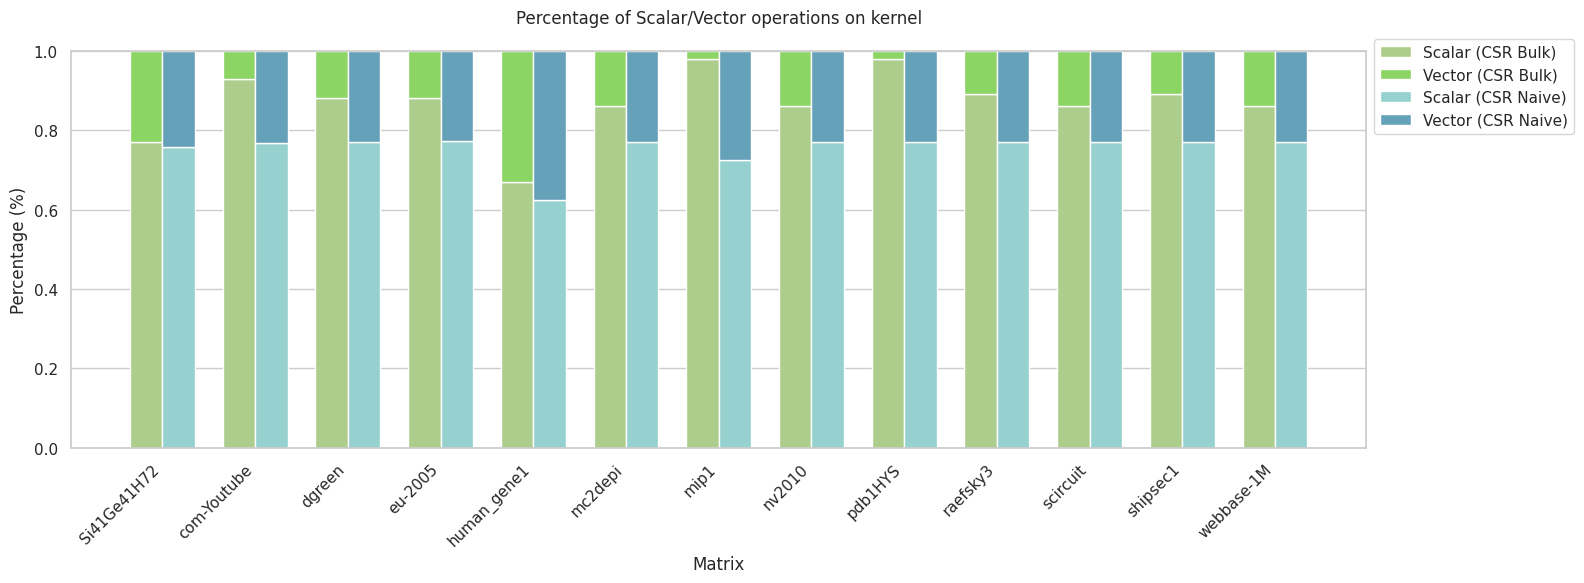

In [15]:
import numpy as np

# Plot percentages of Vector/Scalar operations on kernel

bulk_colors = ["#ADCD8D", "#8CD463"]
naive_colors = ["#96D1CF", "#65A1B8"]
sellcs_colors = ["#fcb955", "#Eb6424"]

# Plot Title
plotTitle = "Percentage of Scalar/Vector operations on kernel"

# Y-Axis Title
sideTitle = "Percentage (%)"

# X-Axis Title
xTitle = "Matrix"

# Create figure
seaborn.set_theme(style="whitegrid", palette="deep")
fig, ax = plt.subplots(figsize=(16,6))

# Process data for both implementations - simplified approach
x = np.arange(len(df_csr_bulk['matrix_name'].unique()))
width = 0.35

# Plot for CSR Bulk
bulk_data = df_csr_bulk[['matrix_name', 'scalar_perc', 'vector_perc']]
ax.bar(x - width/2, bulk_data['scalar_perc'], width, label='Scalar (CSR Bulk)', color=bulk_colors[0])
ax.bar(x - width/2, bulk_data['vector_perc'], width, bottom=bulk_data['scalar_perc'], 
       label='Vector (CSR Bulk)', color=bulk_colors[1])

# Plot for CSR Naive
naive_data = df_csr_naive[['matrix_name', 'scalar_perc', 'vector_perc']]
ax.bar(x + width/2, naive_data['scalar_perc'], width, label='Scalar (CSR Naive)', color=naive_colors[0])
ax.bar(x + width/2, naive_data['vector_perc'], width, bottom=naive_data['scalar_perc'], 
       label='Vector (CSR Naive)', color=naive_colors[1])

# Customize plot
ax.set_title(plotTitle, pad=20)
ax.set_ylabel(sideTitle)
ax.set_xlabel(xTitle)
ax.set_xticks(x)
ax.set_xticklabels(df_csr_bulk['matrix_name'].unique(), rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.05))

plt.tight_layout()
plt.show()

Geometric Mean of the Difference for CSR Bulk: 178.57
Geometric Mean of the Difference for CSR Naive: 6.51


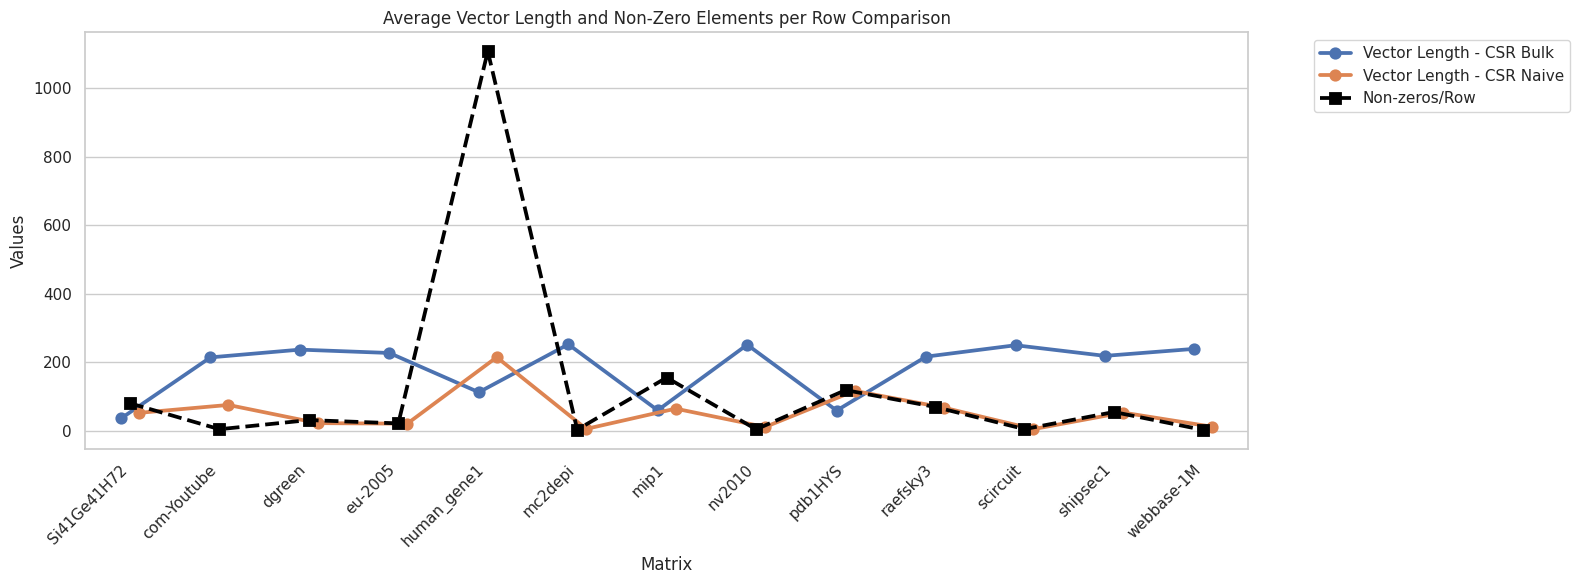

In [ ]:
from scipy.stats import gmean

# Create figure for point plot
plt.figure(figsize=(16, 6))

# Create point plot for vector lengths of both implementations
seaborn.pointplot(data=df_combined, x='matrix_name', y='average_vector_length', 
                  hue='implementation', marker='o', linestyles='-', dodge=0.2)

# Add non-zeros/row only once (using data from first implementation since it's the same)
seaborn.pointplot(data=df_csr_bulk, x='matrix_name', y='average_non_zeros_per_row', 
                  color='black', marker='s', linestyles='--', label='Non-zeros/Row')

# Calculate geometric means for both implementations
for impl in ['CSR Bulk', 'CSR Naive']:
    impl_data = df_combined[df_combined['implementation'] == impl]
    vector_length = impl_data['average_vector_length']
    non_zero_elements = impl_data['average_non_zeros_per_row']
    difference = abs(vector_length - non_zero_elements)
    geomean_difference = gmean(difference[difference > 0])
    print(f"Geometric Mean of the Difference for {impl}: {geomean_difference:.2f}")

plt.title("Average Vector Length and Non-Zero Elements per Row Comparison")
plt.xlabel("Matrix")
plt.ylabel("Values")
plt.xticks(rotation=45, ha='right')

# Update legend to show vector lengths for both implementations and single non-zeros/row
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Vector Length - CSR Bulk', 'Vector Length - CSR Naive', 'Non-zeros/Row']
plt.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()